In [61]:
import pandas as pd
pd.set_option('display.max_columns', 90)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy.special import boxcox1p

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import LabelEncoder

In [62]:
train = pd.read_csv('train.csv')

In [63]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
test = pd.read_csv('test.csv')

In [65]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


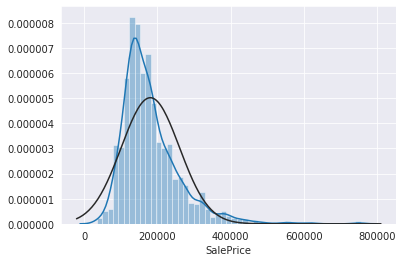

In [66]:
sns.distplot(train['SalePrice'], fit=norm)

In [67]:
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 180921.20 and sigma = 79415.29



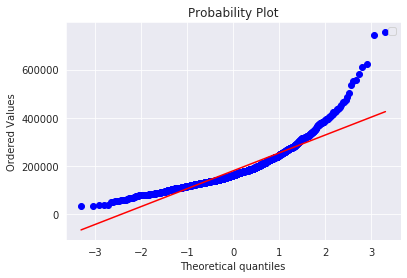

In [68]:
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [69]:
train.shape

(1460, 81)

In [70]:
test.shape

(1459, 80)

In [71]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <a list of 10 Patch objects>)

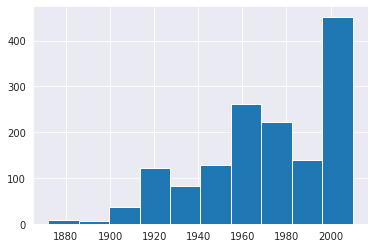

In [72]:
plt.hist(train['YearBuilt'])

(array([  7.,  28.,  51., 119.,  67., 174., 241., 177., 131., 464.]),
 array([1879. , 1892.1, 1905.2, 1918.3, 1931.4, 1944.5, 1957.6, 1970.7,
        1983.8, 1996.9, 2010. ]),
 <a list of 10 Patch objects>)

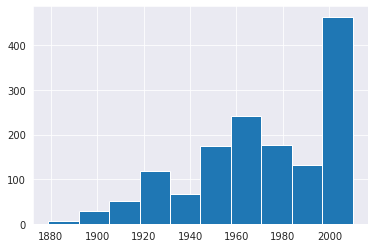

In [73]:
plt.hist(test['YearBuilt'])

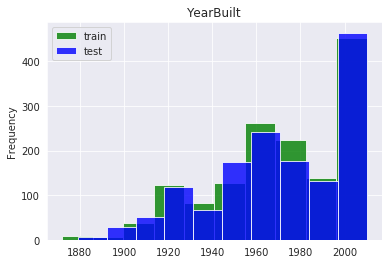

In [74]:
kwargs = dict(alpha=0.8, bins=10)
plt.hist(train['YearBuilt'], **kwargs, color='g', label='train')
plt.hist(test['YearBuilt'], **kwargs, color='b', label='test')
plt.gca().set(title='YearBuilt', ylabel='Frequency')
plt.legend()

In [75]:
train[train['YearBuilt'] < 1880]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1137,1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,780,780,GasA,Gd,N,SBrkr,780,240,0,1020,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,176,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000


In [76]:
combined = pd.concat([train, test])

In [77]:
num_cols = combined.select_dtypes(exclude=['object']).dtypes.index.tolist()

In [78]:
combined.shape

(2919, 81)

In [79]:
num_cols

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [80]:
num_cols.remove('Id')

In [81]:
num_cols.remove('SalePrice')

In [82]:
'''
for col in num_cols:
    kwargs = dict(alpha=0.8)
    plt.hist(train[col], **kwargs, color='g', label='train')
    plt.hist(test[col], **kwargs, color='r', label='test')
    plt.gca().set(title=col, ylabel='Frequency')
    plt.legend()
    plt.show()
'''

"\nfor col in num_cols:\n    kwargs = dict(alpha=0.8)\n    plt.hist(train[col], **kwargs, color='g', label='train')\n    plt.hist(test[col], **kwargs, color='r', label='test')\n    plt.gca().set(title=col, ylabel='Frequency')\n    plt.legend()\n    plt.show()\n"

In [83]:
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000))]
# train.drop(train['GarageArea'], inplace=True)
train.drop(train[train.TotalBsmtSF>3000].index, inplace=True)
train.drop(train[train.YearBuilt<1900].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [84]:
train.shape

(1440, 81)

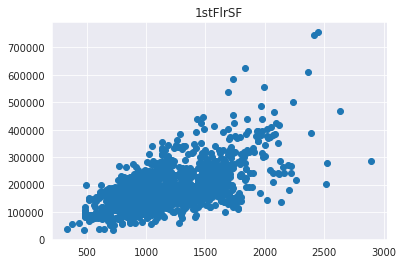

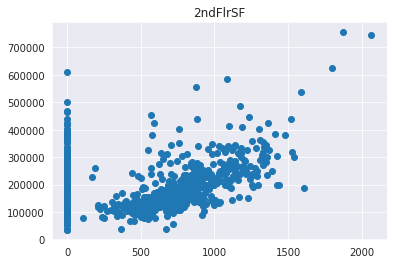

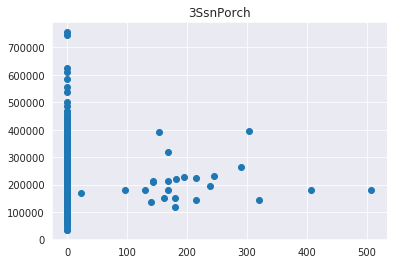

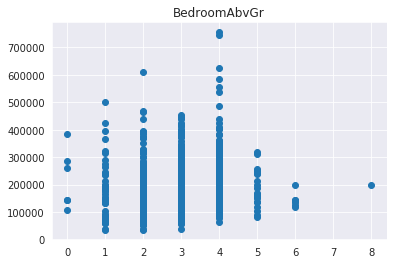

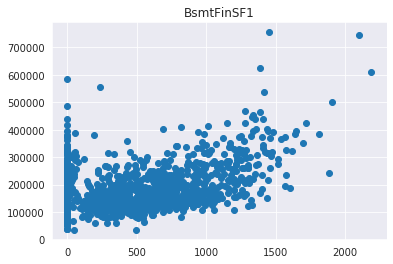

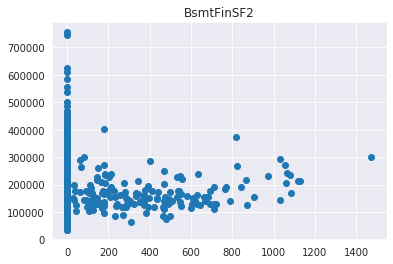

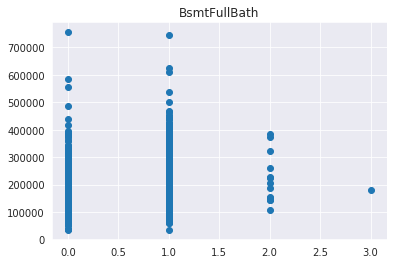

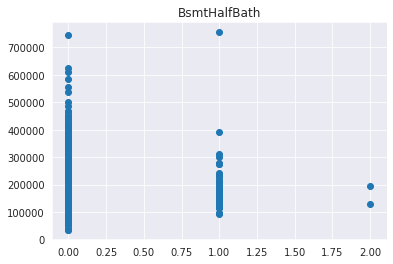

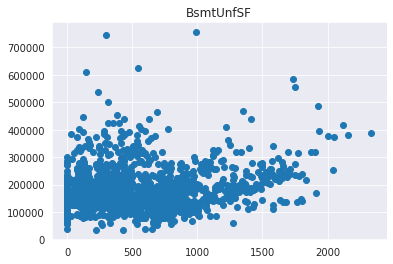

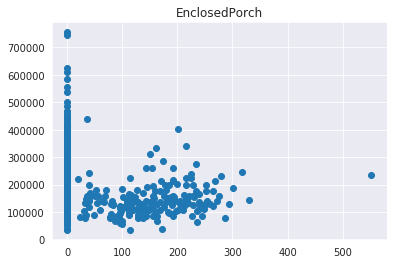

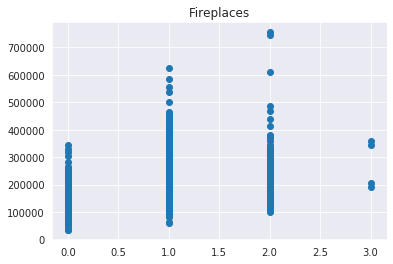

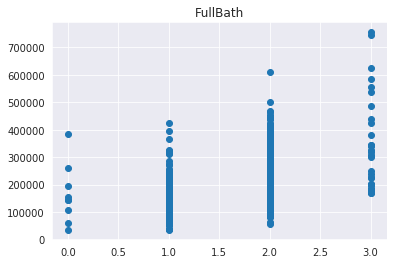

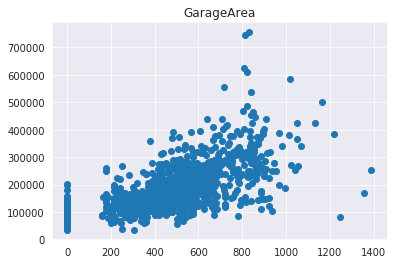

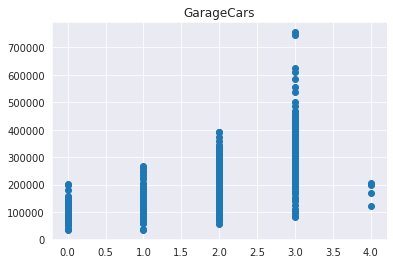

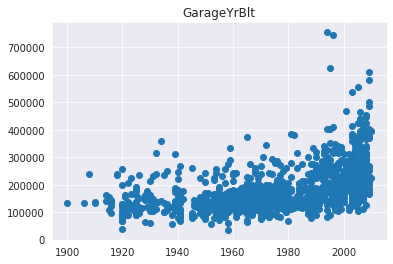

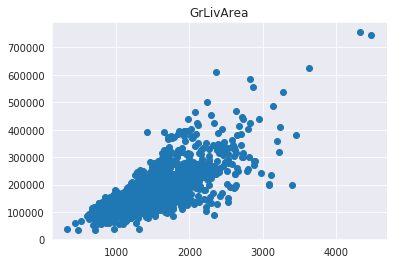

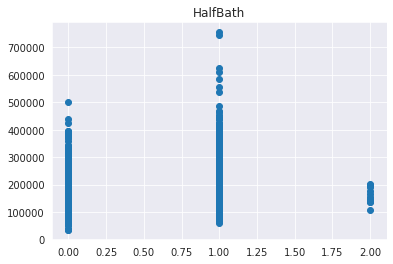

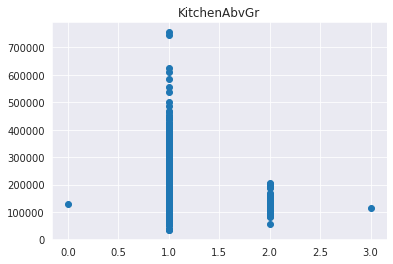

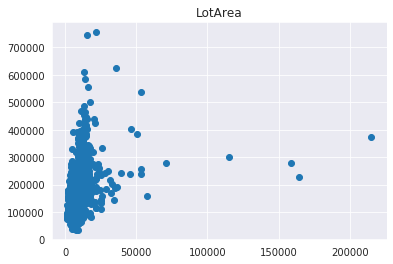

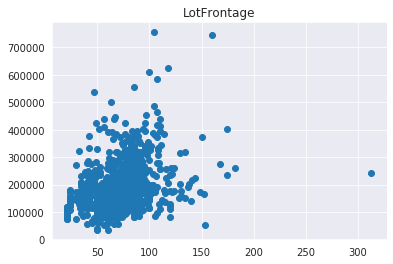

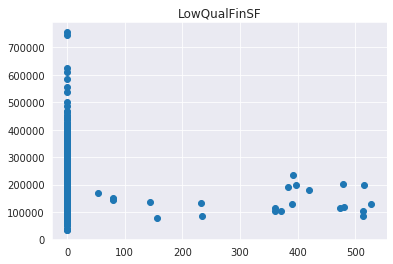

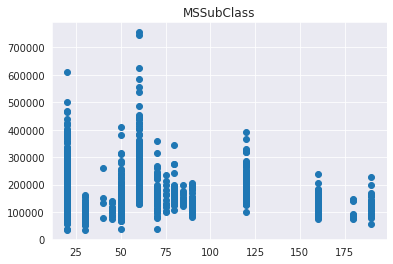

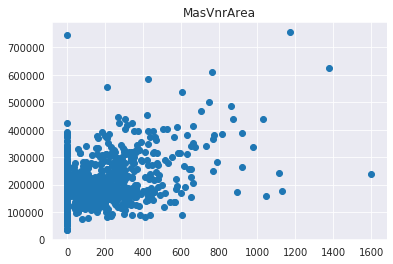

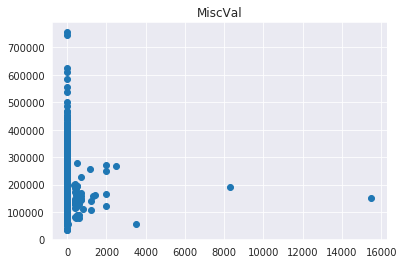

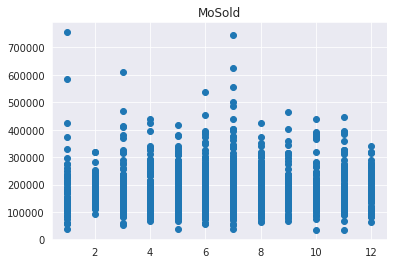

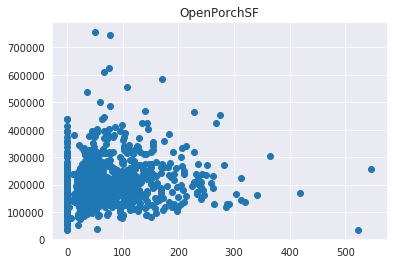

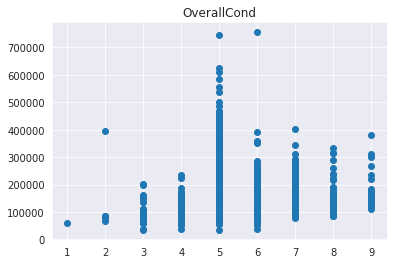

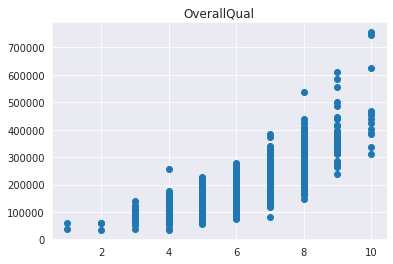

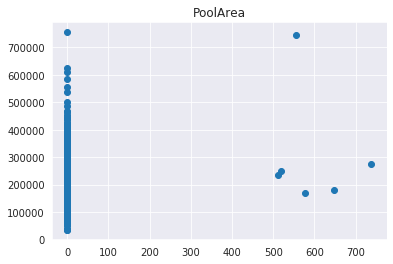

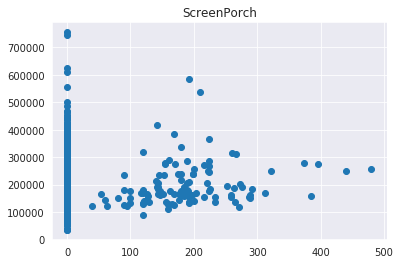

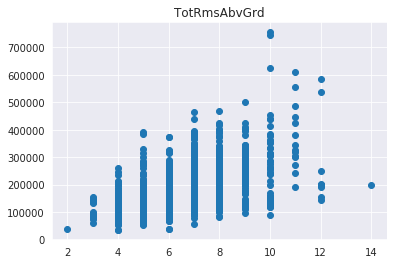

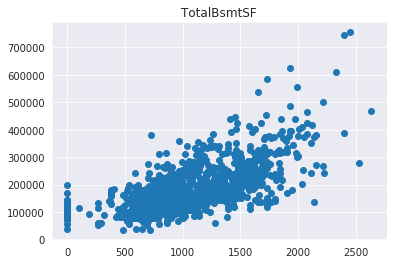

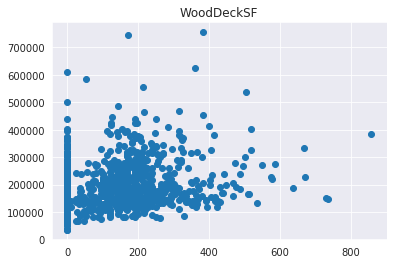

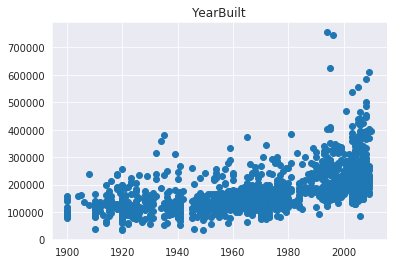

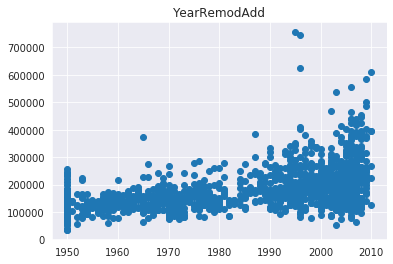

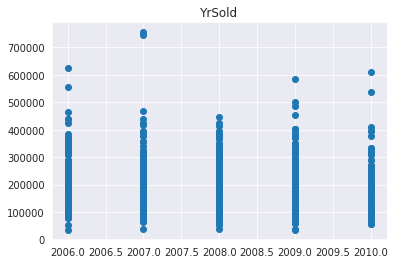

In [85]:
for col in num_cols:
    plt.scatter(x=train[col], y=train['SalePrice'])
    plt.gca().set(title=col)
    plt.show()

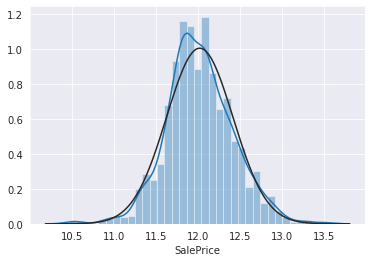

In [86]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm)

In [87]:
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 12.02 and sigma = 0.40



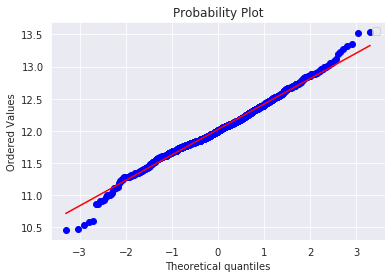

In [88]:
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [89]:
train.shape

(1440, 81)

In [90]:
combined = pd.concat([train, test])

In [91]:
combined.shape

(2899, 81)

In [92]:
combined.drop(['GarageArea'], inplace=True, axis=1)

In [93]:
combined.shape

(2899, 80)

In [94]:
combined.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2899.000000,2899.000000,2899.000000,2899.000000,2898.000000,2898.000000,2897.000000,2897.000000,2898.000000,2899.000000,2899.000000,2899.000000,2898.000000,2742.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2414.000000,2899.000000,2899.000000,2876.000000,2899.000000,2899.000000,2899.00000,2899.000000,2899.000000,2899.000000,1440.000000,2899.000000,2899.000000,2898.000000,2899.000000,2899.000000,2899.000000,2899.000000
mean,1156.014143,332.936875,2.620214,2.857882,439.780538,49.573154,0.430790,0.061788,558.332298,22.682649,0.596413,1.566057,1.765355,1978.143691,1493.368403,0.380476,1464.742670,1.043463,10129.978268,69.129246,4.417385,57.086927,102.197844,51.021387,6.206623,46.99724,5.559158,6.082097,2.101759,12.022718,15.973094,6.433598,1047.685990,93.886513,1971.704036,1984.225595,2007.790617
std,383.264200,425.645523,25.274005,0.821856,443.355299,169.312098,0.524396,0.246481,438.607239,63.445700,0.644508,0.551083,0.759349,25.530843,491.438831,0.503039,843.102908,0.210592,7822.470265,22.799016,45.142314,42.562519,178.860652,569.293558,2.711530,66.40941,1.105948,1.401525,34.668145,0.396820,55.813359,1.552172,424.579529,126.665702,29.715421,20.909665,1.315605
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,10.460271,0.000000,2.000000,0.000000,0.000000,1879.000000,1950.000000,2006.000000
25%,875.500000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,219.000000,0.000000,0.000000,1.000000,1.000000,1960.000000,1124.500000,0.000000,735.500000,1.000000,7461.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.00000,5.000000,5.000000,0.000000,11.775297,0.000000,5.000000,793.000000,0.000000,1954.000000,1965.000000,2007.000000
50%,1081.000000,0.000000,0.000000,3.000000,370.500000,0.000000,0.000000,0.000000,463.500000,0.000000,1.000000,2.000000,2.000000,1979.000000,1441.000000,0.000000,1470.000000,1.000000,9439.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.00000,5.000000,6.000000,0.000000,12.001512,0.000000,6.000000,988.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1383.000000,702.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,801.000000,0.000000,1.000000,2.000000,2.000000,2002.000000,1738.000000,1.000000,2194.500000,1.000000,11539.500000,80.000000,0.000000,70.000000,164.250000,0.000000,8.000000,70.00000,6.000000,7.000000,0.000000,12.271982,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,4010.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,5.000000,2207.000000,5095.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.00000,9.000000,10.000000,800.000000,13.534474,576.000000,15.000000,5095.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [95]:
missing_columns = combined.columns[combined.isnull().any()].values
'''Number of columns with missing obervation'''
total_missing_columns = np.count_nonzero(combined.isnull().sum())
print('We have ' , total_missing_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)
missing_columns = len(combined) - combined.loc[:, np.sum(combined.isnull())>0].count()

We have  34 features with missing values and those features (with missing values) are: 

 ['Alley' 'BsmtCond' 'BsmtExposure' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtFinType1' 'BsmtFinType2' 'BsmtFullBath' 'BsmtHalfBath' 'BsmtQual'
 'BsmtUnfSF' 'Electrical' 'Exterior1st' 'Exterior2nd' 'Fence'
 'FireplaceQu' 'Functional' 'GarageCars' 'GarageCond' 'GarageFinish'
 'GarageQual' 'GarageType' 'GarageYrBlt' 'KitchenQual' 'LotFrontage'
 'MSZoning' 'MasVnrArea' 'MasVnrType' 'MiscFeature' 'PoolQC' 'SalePrice'
 'SaleType' 'TotalBsmtSF' 'Utilities']


In [96]:
missing_columns

Alley           2707
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      79
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2332
FireplaceQu     1410
Functional         2
GarageCars         1
GarageCond       157
GarageFinish     157
GarageQual       157
GarageType       155
GarageYrBlt      157
KitchenQual        1
LotFrontage      485
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2795
PoolQC          2890
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [97]:
to_impute_by_no_info = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu',
                       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'MasVnrType', 'MiscFeature', 'PoolQC']
for col in to_impute_by_no_info:
    combined[col].fillna('no_info', inplace=True)

In [98]:
# imputing missing values
combined['BsmtFinSF1'] = combined['BsmtFinSF1'].fillna(0)
combined['BsmtFinSF2'] = combined['BsmtFinSF2'].fillna(0)
combined['BsmtFullBath'] = combined['BsmtFullBath'].fillna(0)
combined['BsmtHalfBath'] = combined['BsmtHalfBath'].fillna(0)
combined['BsmtUnfSF'] = combined['BsmtUnfSF'].fillna(0)
combined['GarageCars'] = combined['GarageCars'].fillna(0)
combined['GarageYrBlt'] = combined['GarageYrBlt'].fillna(0)
combined['MasVnrArea'] = combined['MasVnrArea'].fillna(0)
combined['TotalBsmtSF'] = combined['TotalBsmtSF'].fillna(0)

In [99]:
to_impute_by_mode = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'Utilities']

for col in to_impute_by_mode:
    combined[col].fillna(combined[col].mode()[0], inplace=True)

In [100]:
combined.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [101]:
categorical_cols = ['BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
                   'KitchenAbvGr', 'MSSubClass', 'MoSold', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'YrSold']

for col in categorical_cols:
    combined[col] = combined[col].apply(str)    

In [102]:
combined['LotFrontage'] = combined.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [103]:
num_cols = combined.select_dtypes(exclude=['object']).dtypes.index.tolist()

for col in num_cols:
    if col == 'Id' or col == 'SalePrice':
        pass
    else:
        print(col)
        skewed_feats = skew(combined[col]) #compute skewness
        lam = 0.15
        if abs(skewed_feats) > 0.5:
            skewed_feats_log1p = skew(boxcox1p(combined[col], lam))
            if abs(skewed_feats_log1p) < abs(skewed_feats):
                combined[col] = boxcox1p(combined[col], lam)

1stFlrSF
2ndFlrSF
3SsnPorch
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
EnclosedPorch
GarageYrBlt
GrLivArea
LotArea
LotFrontage
LowQualFinSF
MasVnrArea
MiscVal
OpenPorchSF
PoolArea
ScreenPorch
TotalBsmtSF
WoodDeckSF
YearBuilt
YearRemodAdd


In [104]:
'''
cat_cols = combined.select_dtypes(include=['object']).dtypes.index.tolist()
for c in cat_cols:
    lbl = LabelEncoder() 
    # lbl.fit(list(train[c].values)) 
    lst = list(combined[c].values)
    lbl.fit(lst) 
    combined[c] = lbl.transform(list(combined[c].values))
'''  
categorical_cols = ['BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
                   'KitchenAbvGr', 'MoSold', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'YrSold']

for c in categorical_cols:
    lbl = LabelEncoder() 
    # lbl.fit(list(train[c].values)) 
    lst = list(combined[c].values)
    lbl.fit(lst) 
    combined[c] = lbl.transform(list(combined[c].values))

In [105]:
combined.dtypes.value_counts()

object     44
float64    20
int64      16
dtype: int64

In [106]:
cols = list(combined)
print(cols)
cols.insert(0, cols.pop(cols.index('SalePrice')))
combined = combined.loc[:, cols]
combined = pd.get_dummies(combined)
print(list(combined))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street', 'TotRmsAbvGr

In [107]:
combined.dtypes

SalePrice                float64
1stFlrSF                 float64
2ndFlrSF                 float64
3SsnPorch                float64
BedroomAbvGr               int64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtFullBath               int64
BsmtHalfBath               int64
BsmtUnfSF                float64
EnclosedPorch            float64
Fireplaces                 int64
FullBath                   int64
GarageCars                 int64
GarageYrBlt              float64
GrLivArea                float64
HalfBath                   int64
Id                         int64
KitchenAbvGr               int64
LotArea                  float64
LotFrontage              float64
LowQualFinSF             float64
MasVnrArea               float64
MiscVal                  float64
MoSold                     int64
OpenPorchSF              float64
OverallCond                int64
OverallQual                int64
PoolArea                 float64
ScreenPorch              float64
          

In [108]:
train = combined.iloc[0:1440, :]

In [109]:
from sklearn.model_selection import train_test_split
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=77)

In [110]:
X_train.head()

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_Pave,Alley_no_info,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_no_info,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
729,12.154785,11.718228,11.718228,0.0,3,0.000000,0.0,0,0,864.0,0.000000,0,2,2,2004.0,13.730883,1,740,1,19.592393,5.831328,0.0,0.0,0.0,6,5.559490,4,7,0.0,0.0,11,864.0,7.956197,2004,2004,3,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
453,11.989166,11.617857,11.617857,0.0,3,0.000000,0.0,0,0,588.0,0.000000,1,1,1,1925.0,13.619458,0,459,1,17.324813,5.684507,0.0,0.0,0.0,8,5.773773,6,8,0.0,0.0,11,588.0,8.013884,1925,1996,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
409,11.652696,12.203296,0.000000,0.0,2,0.000000,0.0,0,0,1008.0,7.184917,1,1,2,1927.0,12.203296,0,414,1,19.440649,5.559490,0.0,0.0,0.0,5,0.000000,5,5,0.0,0.0,9,1008.0,0.000000,1927,1950,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1225,12.422510,13.661197,0.000000,0.0,3,0.000000,0.0,0,0,1689.0,0.000000,0,2,3,2007.0,13.661197,0,1242,1,19.813711,6.291711,0.0,0.0,0.0,8,5.559490,5,7,0.0,0.0,11,1689.0,0.000000,2007,2007,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
1370,11.782960,11.734130,9.384956,0.0,3,9.558416,0.0,0,1,360.0,0.000000,1,1,2,2003.0,12.689052,0,1390,1,17.916752,5.684507,0.0,0.0,0.0,5,0.000000,5,6,0.0,0.0,10,735.0,0.000000,1941,1950,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [111]:
test = combined.iloc[1440:, :]

In [112]:
test.head()

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_Pave,Alley_no_info,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_no_info,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,NaN,11.818680,0.000000,0.0,2,10.105326,7.397498,0,0,270.0,0.0,0,1,1,1961.0,11.818680,0,1461,1,20.479373,6.221214,0.0,0.000000,0.000000,8,0.000000,5,5,0.0,7.020909,9,882.0,7.338607,1961,1961,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,NaN,12.943735,0.000000,0.0,3,11.901094,0.000000,0,0,406.0,0.0,0,1,1,1958.0,12.943735,1,1462,1,21.327220,6.244956,0.0,6.808145,20.777526,8,4.792130,5,6,0.0,0.000000,10,1329.0,9.672623,1958,1958,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,NaN,11.916131,11.151348,0.0,3,11.476685,0.000000,0,0,137.0,0.0,1,2,2,1997.0,13.551272,1,1463,1,21.196905,6.073289,0.0,0.000000,0.000000,5,4.697012,4,5,0.0,0.000000,10,928.0,8.232627,1997,1998,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,NaN,11.910125,11.062536,0.0,3,10.749651,0.000000,0,0,324.0,0.0,1,2,2,1998.0,13.504453,1,1464,1,19.865444,6.172972,0.0,3.858807,0.000000,8,4.792130,5,6,0.0,0.000000,11,926.0,9.459637,1998,1998,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,NaN,12.833625,0.000000,0.0,2,8.720170,0.000000,0,0,1017.0,0.0,0,2,2,1992.0,12.833625,0,1465,1,17.257255,5.093857,0.0,0.000000,0.000000,0,6.268453,4,8,0.0,7.397498,9,1280.0,0.000000,1992,1992,4,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [113]:
X_train.to_csv('train_prep.csv', index=False, header=False)
X_test.to_csv('validation_prep.csv', index=False, header=False)

In [114]:
test.to_csv('test_prep.csv', index=False)

In [115]:
combined.dtypes.to_csv('columns.csv')

In [116]:
cols_loaded = pd.read_csv('columns.csv', header=None)

In [117]:
col_types = cols_loaded.set_index(0).rename(columns={1:'index1'}).to_dict()

In [118]:
col_types['index1']

{'SalePrice': 'float64',
 '1stFlrSF': 'float64',
 '2ndFlrSF': 'float64',
 '3SsnPorch': 'float64',
 'BedroomAbvGr': 'int64',
 'BsmtFinSF1': 'float64',
 'BsmtFinSF2': 'float64',
 'BsmtFullBath': 'int64',
 'BsmtHalfBath': 'int64',
 'BsmtUnfSF': 'float64',
 'EnclosedPorch': 'float64',
 'Fireplaces': 'int64',
 'FullBath': 'int64',
 'GarageCars': 'int64',
 'GarageYrBlt': 'float64',
 'GrLivArea': 'float64',
 'HalfBath': 'int64',
 'Id': 'int64',
 'KitchenAbvGr': 'int64',
 'LotArea': 'float64',
 'LotFrontage': 'float64',
 'LowQualFinSF': 'float64',
 'MasVnrArea': 'float64',
 'MiscVal': 'float64',
 'MoSold': 'int64',
 'OpenPorchSF': 'float64',
 'OverallCond': 'int64',
 'OverallQual': 'int64',
 'PoolArea': 'float64',
 'ScreenPorch': 'float64',
 'TotRmsAbvGrd': 'int64',
 'TotalBsmtSF': 'float64',
 'WoodDeckSF': 'float64',
 'YearBuilt': 'int64',
 'YearRemodAdd': 'int64',
 'YrSold': 'int64',
 'Alley_Grvl': 'uint8',
 'Alley_Pave': 'uint8',
 'Alley_no_info': 'uint8',
 'BldgType_1Fam': 'uint8',
 'BldgT

In [119]:
train_loaded = pd.read_csv('train_prep.csv', dtype=col_types['index1'])

In [120]:
train_loaded.dtypes

12.154784614286667      float64
11.718228468762483      float64
11.718228468762483.1    float64
0.0                     float64
3                         int64
0.0.1                   float64
0.0.2                   float64
0                         int64
0.1                       int64
864.0                   float64
0.0.3                   float64
0.2                       int64
2                         int64
2.1                       int64
2004.0                  float64
13.730882561077351      float64
1                         int64
740                       int64
1.1                       int64
19.592393361444934      float64
5.831327892742091       float64
0.0.4                   float64
0.0.5                   float64
0.0.6                   float64
6                         int64
5.559490358416789       float64
4                         int64
7                         int64
0.0.7                   float64
0.0.8                   float64
                         ...   
0.216   